# STAT 4000 Final Project Code
### Caleb Maddry

In [1]:
## Installing of packages
install.packages('anytime')
# install.packages('chron')

## Libraries
library(ggplot2)
# library(chron)
library(hms)
library(anytime)
library(tidyr)
library(tidyverse)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ readr   2.1.3      ✔ stringr 1.5.0 
✔ purrr   1.0.0      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
## Storing the data
data = read.csv("data.csv")
preprocessed_data = read.csv("preprocessed_data.csv")
raw_fighter_details = read.csv("raw_fighter_details.csv")
raw_total_fight_data = read.csv("raw_total_fight_data.csv", sep = ';')

head(raw_total_fight_data)
head(raw_fighter_details)
head(data)
head(preprocessed_data)

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,⋯,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Adrian Yanez,Gustavo Lopez,2,0,41 of 103,23 of 51,39%,45%,41 of 103,23 of 51,⋯,0 of 0,KO/TKO,3,0:27,3 Rnd (5-5-5),Chris Tognoni,"March 20, 2021","Las Vegas, Nevada, USA",Bantamweight Bout,Adrian Yanez
2,Trevin Giles,Roman Dolidze,0,0,27 of 57,32 of 67,47%,47%,43 of 73,75 of 110,⋯,1 of 2,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Herb Dean,"March 20, 2021","Las Vegas, Nevada, USA",Middleweight Bout,Trevin Giles
3,Tai Tuivasa,Harry Hunsucker,1,0,14 of 18,2 of 6,77%,33%,14 of 18,2 of 6,⋯,0 of 0,KO/TKO,1,0:49,3 Rnd (5-5-5),Herb Dean,"March 20, 2021","Las Vegas, Nevada, USA",Heavyweight Bout,Tai Tuivasa
4,Cheyanne Buys,Montserrat Conejo,0,0,31 of 65,15 of 41,47%,36%,49 of 87,136 of 168,⋯,0 of 0,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Mark Smith,"March 20, 2021","Las Vegas, Nevada, USA",Women's Strawweight Bout,Montserrat Conejo
5,Marion Reneau,Macy Chiasson,0,0,30 of 63,51 of 138,47%,36%,59 of 93,92 of 184,⋯,2 of 4,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Mark Smith,"March 20, 2021","Las Vegas, Nevada, USA",Women's Bantamweight Bout,Macy Chiasson
6,Leonardo Santos,Grant Dawson,0,0,30 of 67,46 of 84,44%,54%,74 of 115,75 of 132,⋯,4 of 5,KO/TKO,3,4:59,3 Rnd (5-5-5),Chris Tognoni,"March 20, 2021","Las Vegas, Nevada, USA",Lightweight Bout,Grant Dawson


,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
1,Tom Aaron,,155 lbs.,,,"Jul 13, 1978",0.00,0%,0.00,0%,0.00,0%,0%,0.0
2,Papy Abedi,"5' 11""",185 lbs.,,Southpaw,"Jun 30, 1978",2.80,55%,3.15,48%,3.47,57%,50%,1.3
3,Shamil Abdurakhimov,"6' 3""",235 lbs.,"76""",Orthodox,"Sep 02, 1981",2.45,44%,2.45,58%,1.23,24%,47%,0.2
4,Danny Abbadi,"5' 11""",155 lbs.,,Orthodox,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0
5,Hiroyuki Abe,"5' 6""",145 lbs.,,Orthodox,,1.71,36%,3.11,63%,0.00,0%,33%,0.0
6,Ricardo Abreu,"5' 11""",185 lbs.,,Orthodox,"Apr 27, 1984",3.79,31%,3.98,68%,2.13,42%,100%,0.7


,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,⋯,R_win_by_Decision_Unanimous,R_win_by_KO.TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0,⋯,0,1,0,0,Orthodox,170.18,177.80,135,31,27
2,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0,⋯,0,3,0,0,Orthodox,182.88,187.96,185,32,28
3,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NA,NA,⋯,1,3,0,0,Southpaw,187.96,190.50,264,32,28
4,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NA,NA,⋯,0,0,0,0,Switch,160.02,160.02,115,28,25
5,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0,⋯,1,2,2,0,Orthodox,167.64,172.72,135,29,43
6,Leonardo Santos,Grant Dawson,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,Lightweight,0.000,0,⋯,2,2,2,0,Orthodox,182.88,190.50,155,27,41


,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,⋯,B_Stance_Open.Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open.Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Red,False,0.000000,0,0.420000,0.49500,0.330,0.36000,0.500000,1.00000000,⋯,0,1,0,0,0,0,1,0,0,0
2,Red,False,0.500000,0,0.660000,0.30500,0.300,0.50000,1.500000,0.00000000,⋯,0,1,0,0,0,0,1,0,0,0
3,Red,False,0.015625,0,0.450000,0.42750,0.250,0.20000,0.148468,0.09838867,⋯,0,1,0,0,0,0,0,0,1,0
4,Blue,False,0.015625,0,0.450000,0.42750,0.250,0.20000,0.148468,0.09838867,⋯,0,0,0,1,0,0,0,0,0,1
5,Blue,False,0.125000,0,0.535625,0.57875,0.185,0.16625,0.125000,0.18750000,⋯,0,1,0,0,0,0,1,0,0,0
6,Blue,False,0.000000,0,0.515000,0.47375,0.435,0.25000,1.250000,0.62500000,⋯,0,0,0,0,1,0,1,0,0,0


### Number of fights per year

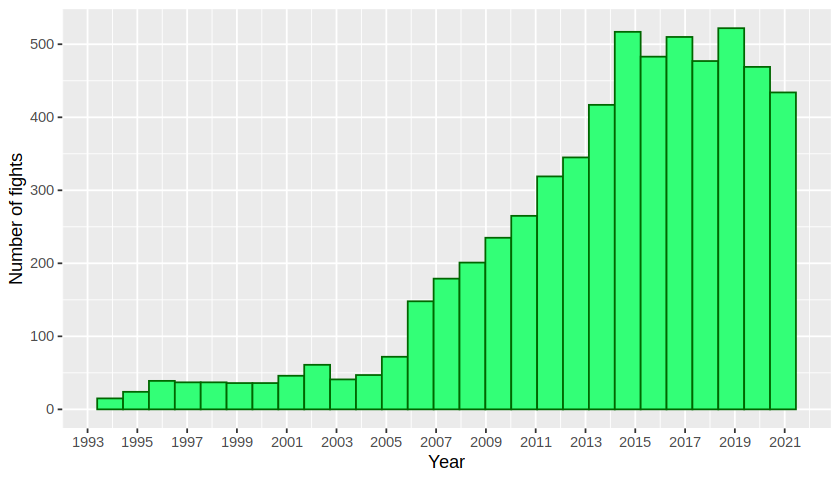

In [3]:
data$date = as.Date(data$date)
data$year = as.numeric(format(data$date, '%Y'))

options(repr.plot.width = 7, repr.plot.height = 4) 
ggplot(data, aes(date)) + 
    geom_histogram(bins = max(data$year)-min(data$year), color = '#006600', fill = '#33ff77') + 
    scale_x_date(date_labels = "%Y", date_breaks = "2 years") + 
    labs(y = "Number of fights", x = "Year")

### Knockout weight dependence

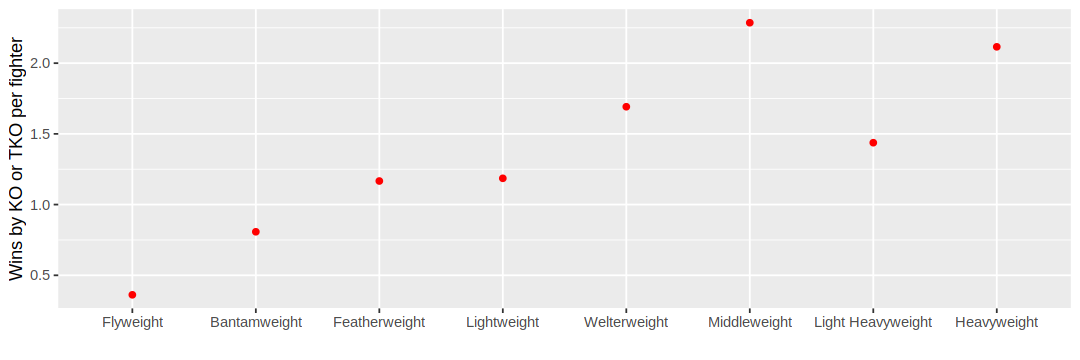

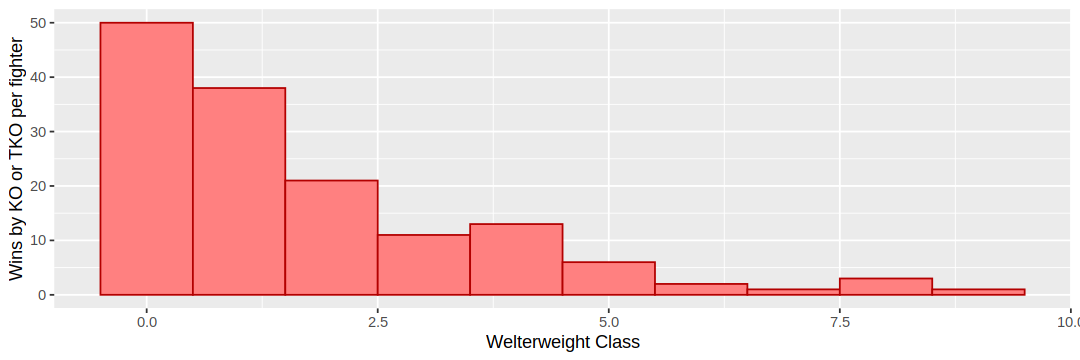

In [4]:
## 2018 KO/TKO per weight class
dataYear2018 = subset(data, year==paste0('20',17))
dataYear2018Flyweight = subset(dataYear2018, weight_class == 'Flyweight')
dataYear2018Bantamweight = subset(dataYear2018, weight_class == 'Bantamweight')
dataYear2018Featherweight = subset(dataYear2018, weight_class == 'Featherweight')
dataYear2018Lightweight = subset(dataYear2018, weight_class == 'Lightweight')
dataYear2018Welterweight = subset(dataYear2018, weight_class == 'Welterweight')
dataYear2018Middleweight = subset(dataYear2018, weight_class == 'Middleweight')
dataYear2018LightHeavyweight = subset(dataYear2018, weight_class == 'LightHeavyweight')
dataYear2018Heavyweight = subset(dataYear2018, weight_class == 'Heavyweight')

a = mean(c(dataYear2018Flyweight[,"R_win_by_KO.TKO"], dataYear2018Flyweight[,"B_win_by_KO.TKO"]))
b = mean(c(dataYear2018Bantamweight[,"R_win_by_KO.TKO"], dataYear2018Bantamweight[,"B_win_by_KO.TKO"]))
c = mean(c(dataYear2018Featherweight[,"R_win_by_KO.TKO"], dataYear2018Featherweight[,"B_win_by_KO.TKO"]))
d = mean(c(dataYear2018Lightweight[,"R_win_by_KO.TKO"], dataYear2018Lightweight[,"B_win_by_KO.TKO"]))
e = mean(c(dataYear2018Welterweight[,"R_win_by_KO.TKO"], dataYear2018Welterweight[,"B_win_by_KO.TKO"]))
f = mean(c(dataYear2018Middleweight[,"R_win_by_KO.TKO"], dataYear2018Middleweight[,"B_win_by_KO.TKO"]))
g = mean(c(dataYear2018LightHeavyweight[,"R_win_by_KO.TKO"], dataYear2018LightHeavyweight[,"B_win_by_KO.TKO"]))
h = mean(c(dataYear2018Heavyweight[,"R_win_by_KO.TKO"], dataYear2018Heavyweight[,"B_win_by_KO.TKO"]))

## Plotting of the dataframe 
df = data.frame(x = c('Flyweight','Bantamweight','Featherweight','Lightweight',
                      'Welterweight','Middleweight','Light Heavyweight','Heavyweight'), y = c(a,b,c,d,e,f,g,h))
options(repr.plot.width = 9, repr.plot.height =3) 
                                     
df$x = factor(df$x, levels = c('Flyweight','Bantamweight','Featherweight','Lightweight',
                               'Welterweight','Middleweight','Light Heavyweight','Heavyweight'))
ggplot(df) + 
    geom_point(aes(x,y), color = 'red') + 
    labs(y = "Wins by KO or TKO per fighter", x = "")

df = data.frame(c(dataYear2018Welterweight[,"R_win_by_KO.TKO"],dataYear2018Welterweight[,"B_win_by_KO.TKO"]))
colnames(df) = 'num'

ggplot(df) + 
    geom_histogram(aes(num),color = '#b30000', fill = '#ff8080', bins = 10) + 
    labs(y = "Wins by KO or TKO per fighter", x = "Welterweight Class")

x,y,plus,minus
<fct>,<dbl>,<dbl>,<dbl>
Flyweight,0.3620690,0.5172414,0.2241379
Bantamweight,0.8076923,1.0641026,0.5769231
Featherweight,1.1666667,1.4561111,0.8888889
Lightweight,1.1857143,1.3785714,1.0000000
Welterweight,1.6917808,1.9657534,1.4383562
Middleweight,2.2857143,2.7142857,1.8839286
Light Heavyweight,1.4375000,1.7875000,1.1250000
Heavyweight,2.1153846,2.6410256,1.6153846


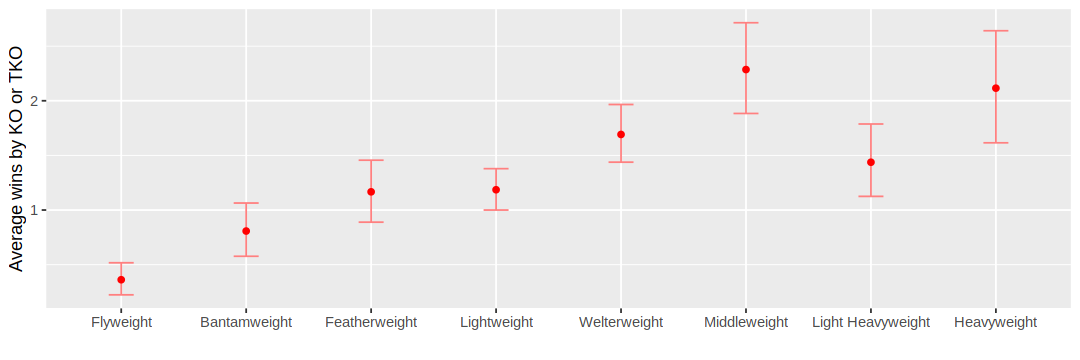

In [5]:
set.seed(344)
ciMatrix = matrix(NA, 8, 2)
alpha = 0.10
B = 10000

sampleData = c(dataYear2018Flyweight[,"R_win_by_KO.TKO"], dataYear2018Flyweight[,"B_win_by_KO.TKO"])
    bootstrapSamples = t(replicate(B, sample(sampleData, length(sampleData), TRUE)))
    thetaStar = apply(bootstrapSamples, 1, mean)
    ciMatrix[1, 1] = quantile(thetaStar, alpha/2)
    ciMatrix[1,2] = quantile(thetaStar, 1 - alpha/2)

sampleData =  c(dataYear2018Bantamweight[,"R_win_by_KO.TKO"], dataYear2018Bantamweight[,"B_win_by_KO.TKO"])
    bootstrapSamples = t(replicate(B, sample(sampleData, length(sampleData), TRUE)))
    thetaStar = apply(bootstrapSamples, 1, mean)
    ciMatrix[2, 1] = quantile(thetaStar, alpha/2)
    ciMatrix[2,2] = quantile(thetaStar, 1 - alpha/2)

sampleData = c(dataYear2018Featherweight[,"R_win_by_KO.TKO"], dataYear2018Featherweight[,"B_win_by_KO.TKO"])
    bootstrapSamples = t(replicate(B, sample(sampleData, length(sampleData), TRUE)))
    thetaStar = apply(bootstrapSamples, 1, mean)
    ciMatrix[3, 1] = quantile(thetaStar, alpha/2)
    ciMatrix[3,2] = quantile(thetaStar, 1 - alpha/2)

sampleData = c(dataYear2018Lightweight[,"R_win_by_KO.TKO"], dataYear2018Lightweight[,"B_win_by_KO.TKO"])
    bootstrapSamples = t(replicate(B, sample(sampleData, length(sampleData), TRUE)))
    thetaStar = apply(bootstrapSamples, 1, mean)
    ciMatrix[4, 1] = quantile(thetaStar, alpha/2)
    ciMatrix[4,2] = quantile(thetaStar, 1 - alpha/2)

sampleData = c(dataYear2018Welterweight[,"R_win_by_KO.TKO"], dataYear2018Welterweight[,"B_win_by_KO.TKO"])
    bootstrapSamples = t(replicate(B, sample(sampleData, length(sampleData), TRUE)))
    thetaStar = apply(bootstrapSamples, 1, mean)
    ciMatrix[5, 1] = quantile(thetaStar, alpha/2)
    ciMatrix[5,2] = quantile(thetaStar, 1 - alpha/2)

sampleData = c(dataYear2018Middleweight[,"R_win_by_KO.TKO"], dataYear2018Middleweight[,"B_win_by_KO.TKO"])
    bootstrapSamples = t(replicate(B, sample(sampleData, length(sampleData), TRUE)))
    thetaStar = apply(bootstrapSamples, 1, mean)
    ciMatrix[6, 1] = quantile(thetaStar, alpha/2)
    ciMatrix[6,2] = quantile(thetaStar, 1 - alpha/2)


sampleData = c(dataYear2018LightHeavyweight[,"R_win_by_KO.TKO"], dataYear2018LightHeavyweight[,"B_win_by_KO.TKO"])
    bootstrapSamples = t(replicate(B, sample(sampleData, length(sampleData), TRUE)))
    thetaStar = apply(bootstrapSamples, 1, mean)
    ciMatrix[7, 1] = quantile(thetaStar, alpha/2)
    ciMatrix[7,2] = quantile(thetaStar, 1 - alpha/2)

sampleData = c(dataYear2018Heavyweight[,"R_win_by_KO.TKO"], dataYear2018Heavyweight[,"B_win_by_KO.TKO"])
    bootstrapSamples = t(replicate(B, sample(sampleData, length(sampleData), TRUE)))
    thetaStar = apply(bootstrapSamples, 1, mean)
    ciMatrix[8, 1] = quantile(thetaStar, alpha/2)
    ciMatrix[8,2] = quantile(thetaStar, 1 - alpha/2)

plus = ciMatrix[,2]
minus = ciMatrix[,1]

df = data.frame(x = c('Flyweight','Bantamweight','Featherweight','Lightweight',
                      'Welterweight','Middleweight','Light Heavyweight','Heavyweight'), 
                y = c(a,b,c,d,e,f,g,h), plus, minus)
                                     
df$x = factor(df$x, levels = c('Flyweight','Bantamweight','Featherweight','Lightweight',
                               'Welterweight','Middleweight','Light Heavyweight','Heavyweight'))
df

ggplot(df) +    
    geom_errorbar(aes(x, y, ymax = plus, 
                      ymin = minus), width = 0.2, color = '#ff8080') + 
    geom_point(aes(x,y), color = 'red') + 
    labs(y = "Average wins by KO or TKO", x = "")

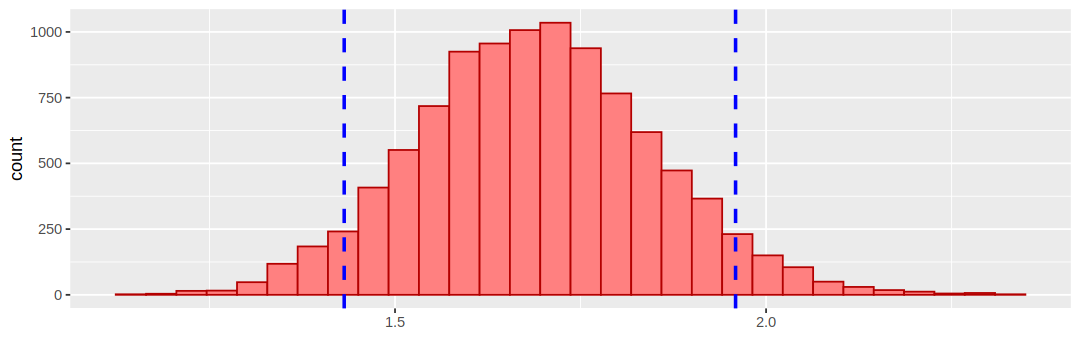

In [6]:
B = 10000
sampleData = c(dataYear2018Welterweight[,"R_win_by_KO.TKO"], dataYear2018Welterweight[,"B_win_by_KO.TKO"])
bootstrapSamples = t(replicate(B, sample(sampleData, length(sampleData), TRUE)))

MLEofTheta = mean(sampleData)
thetaStar = apply(bootstrapSamples, 1, mean)

alpha = 0.10
lowerCI = quantile(thetaStar, alpha/2)
upperCI = quantile(thetaStar, 1 - alpha/2)

thetaStarDF = data.frame(thetaStar)

ggplot(thetaStarDF, aes(thetaStar)) + 
    geom_histogram(color = '#b30000', fill = '#ff8080', bins = 30) + 
    geom_vline(aes(xintercept = lowerCI), color="blue", linetype = "dashed", linewidth = 1) + 
    geom_vline(aes(xintercept = upperCI), color="blue", linetype = "dashed", linewidth = 1) + 
    labs(x = '')

## Control time vs Strike attempts

In [7]:
# options(repr.plot.width = 15, repr.plot.height = 10)
# ggplot(data, aes( B_avg_TD_att)) + 
#  geom_histogram(bins = 20) + 
#  facet_wrap(data$year)
options(repr.plot.width = 6, repr.plot.height = 4)

### Control time analysis

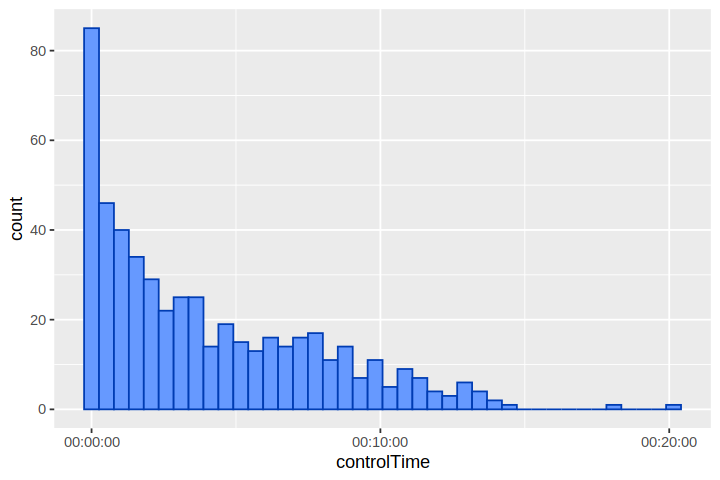

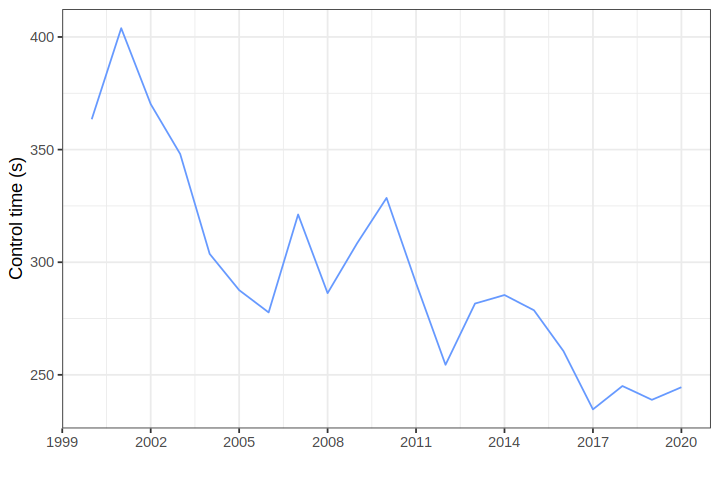

In [8]:
invisible(na.omit(raw_total_fight_data))

## Coverting the data so that there can be a year column
raw_total_fight_data$date = anytime(raw_total_fight_data$date)
raw_total_fight_data$date = as.Date(raw_total_fight_data$date, format = '%m%d%Y')
raw_total_fight_data$year = as.numeric(format(raw_total_fight_data$date, '%Y'))

## Converting the raw control time so that it can be used in hms form 
tempVec = 0
for(i in 1:5823){
   tempVec[i] =  as_hms(paste0('00:', raw_total_fight_data$B_CTRL[i])) + as_hms(paste0('00:', raw_total_fight_data$R_CTRL[i]))
}

## Temp dataframe for plotting reasons
df = data.frame(hms(tempVec), raw_total_fight_data$year[1:5823])
colnames(df) = c('controlTime', 'year')

    ## Plotting to see if the data comes from a normal distribution or not
    ggplot(df[df$year == 2019,], aes(controlTime)) + 
        geom_histogram(fill = '#6699ff', color = '#003cb3', bins = 40)

    ## Calculating the mean and storing it in a vector so that it can be plotted
    meanVector = 0
    yearVector = 0
    for(i in 2000:2020){
        meanVector[i - 1999] = mean(df[df$year == paste0(i),]$controlTime)
        yearVector[i - 1999] = i
    }
    controlTimeVyearDF = data.frame(yearVector, meanVector)

    ## Control time vs. year plot
    ggplot(controlTimeVyearDF, aes(yearVector, meanVector)) + 
         geom_line(color = '#6699ff') + 
         scale_x_continuous(breaks=seq(1999,2020,by=3)) +
         labs(x = '', y = 'Control time (s)') + 
         theme_bw()

#### Data conversion

In [9]:
## Data conversion of raw data to usable form for analysis
# Conversion of strike attempts to a usable form
    raw_total_fight_data = separate(raw_total_fight_data, R_TOTAL_STR., into=c('RTotalStrikesLanded', 'RTotalStrikesAttempted'), sep='of')
    raw_total_fight_data = separate(raw_total_fight_data, B_TOTAL_STR., into=c('BTotalStrikesLanded', 'BTotalStrikesAttempted'), sep='of')

    raw_total_fight_data$RTotalStrikesAttempted  = as.numeric(raw_total_fight_data$RTotalStrikesAttempted)
    raw_total_fight_data$BTotalStrikesAttempted  = as.numeric(raw_total_fight_data$BTotalStrikesAttempted)

    raw_total_fight_data$TotalStrikesAttempted = raw_total_fight_data$RTotalStrikesAttempted + raw_total_fight_data$BTotalStrikesAttempted

# Conversion of leg kick attempts to a usable form
    raw_total_fight_data = separate(raw_total_fight_data, R_LEG, into=c('RLegKicksLanded', 'RLegKicksAttempted'), sep='of')
    raw_total_fight_data = separate(raw_total_fight_data, B_LEG, into=c('BLegKicksLanded', 'BLegKicksAttempted'), sep='of')

    raw_total_fight_data$RLegKicksAttempted  = as.numeric(raw_total_fight_data$RLegKicksAttempted)
    raw_total_fight_data$BLegKicksAttempted  = as.numeric(raw_total_fight_data$BLegKicksAttempted)

    raw_total_fight_data$RLegKicksLanded  = as.numeric(raw_total_fight_data$RLegKicksLanded)
    raw_total_fight_data$BLegKicksLanded  = as.numeric(raw_total_fight_data$BLegKicksLanded)

    raw_total_fight_data$TotalKicksAttempted = raw_total_fight_data$RLegKicksAttempted + raw_total_fight_data$BLegKicksAttempted
    raw_total_fight_data$TotalKicksLanded = raw_total_fight_data$RLegKicksLanded + raw_total_fight_data$BLegKicksLanded

# Time conversion and the addition of a year vector
    raw_total_fight_data$date = anytime(raw_total_fight_data$date)
    raw_total_fight_data$date = as.Date(raw_total_fight_data$date, format = '%m%d%Y')
    raw_total_fight_data$year = as.numeric(format(raw_total_fight_data$date, '%Y'))

# Figuring out which fighter won     
    for(i in 1: length(raw_total_fight_data)){
        if(raw_total_fight_data$R_fighter[i] == raw_total_fight_data$Winner[i]){
            raw_total_fight_data$BlueWon[i] = 0 
            raw_total_fight_data$RedWon[i] = 1 
        }
        else if(raw_total_fight_data$B_fighter[i] == raw_total_fight_data$Winner[i]){
            raw_total_fight_data$BlueWon[i] = 1 
            raw_total_fight_data$RedWon[i] = 0
        }
        else{
            raw_total_fight_data$BlueWon[i] = 10 
            raw_total_fight_data$RedWon[i] = 10  
        }
    }
# Conversion of takedown attempts to a usable form
    raw_total_fight_data = separate(raw_total_fight_data, R_TD, into=c('RTotalTDLanded', 'RTotalTDAttempted'), sep='of')
    raw_total_fight_data = separate(raw_total_fight_data, B_TD, into=c('BTotalTDLanded', 'BTotalTDAttempted'), sep='of')

    raw_total_fight_data$RTotalTDAttempted  = as.numeric(raw_total_fight_data$RTotalTDAttempted)
    raw_total_fight_data$BTotalTDAttempted  = as.numeric(raw_total_fight_data$BTotalTDAttempted)

    raw_total_fight_data$RTotalTDLanded  = as.numeric(raw_total_fight_data$RTotalTDLanded)
    raw_total_fight_data$BTotalTDLanded  = as.numeric(raw_total_fight_data$BTotalTDLanded)

    raw_total_fight_data$TotalTDAttempted = raw_total_fight_data$RTotalTDAttempted + raw_total_fight_data$BTotalTDAttempted
    raw_total_fight_data$TotalTDLanded = raw_total_fight_data$RTotalTDLanded + raw_total_fight_data$BTotalTDLanded

    raw_total_fight_data$TDPercentage  = raw_total_fight_data$TotalTDLanded / raw_total_fight_data$TotalTDAttempted

### Strike attempts over time

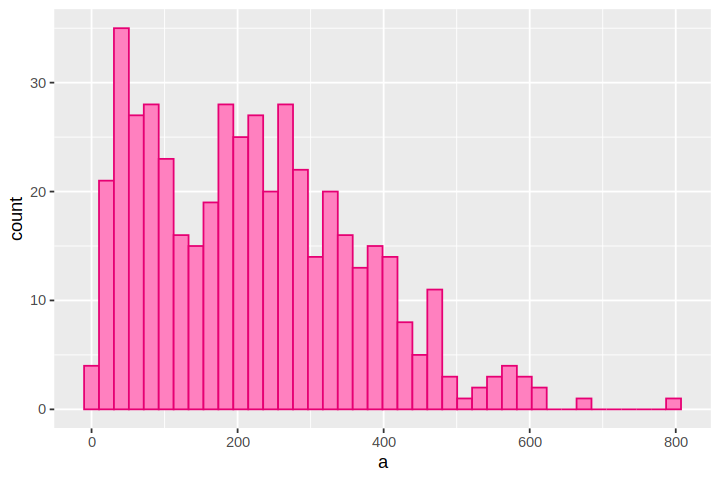

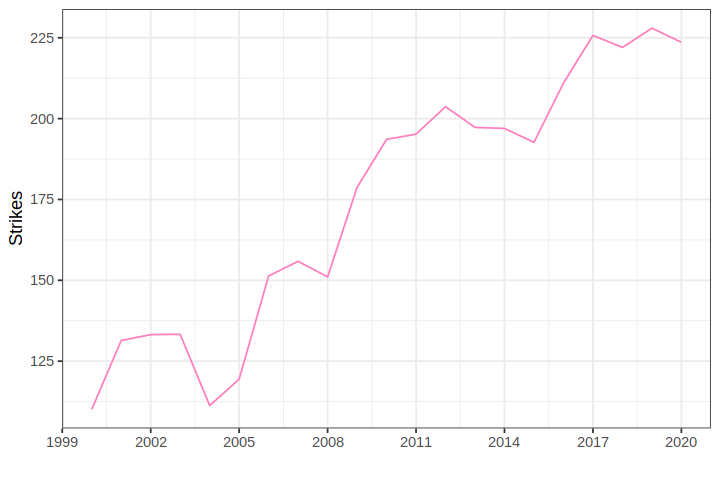

In [10]:
## Total strikes attempted analysis
## Plotting of the histogram of strikes attempted to see if it follows a normal distribution 
a = raw_total_fight_data[raw_total_fight_data$year == paste0(2018),]$TotalStrikesAttempted

x = data.frame(a)
ggplot(x, aes(a)) +
    geom_histogram(fill = '#ff80bf', color = '#e60073', bins = 40)

## Calculation of the average strikes attempted each year
meanVector = 0
yearVector = 0
for(i in 2000:2020){
    meanVector[i - 1999] = mean(raw_total_fight_data[raw_total_fight_data$year == paste0(i),]$TotalStrikesAttempted)
    yearVector[i - 1999] = i
}
strikesVyearDF = data.frame(yearVector, meanVector)

    ## Plotting of the strike attempts per year 
    ggplot(strikesVyearDF, aes(yearVector, meanVector)) + 
        geom_line(color = '#ff80bf') + 
        scale_x_continuous(breaks=seq(1999,2020,by=3)) +
        labs(x = '', y = 'Strikes') +
        theme_bw()

### Correlation calculations for control time vs strikes

In [11]:
controlTimevStrikes = data.frame(strikesVyearDF$meanVector, controlTimeVyearDF$meanVector, controlTimeVyearDF$year)
colnames(controlTimevStrikes) = c('Strikes', 'controlTime', 'year')

paste0('The correlation coeffecient between control time and strikes is: ', round(cor(controlTimevStrikes$controlTime,controlTimevStrikes$Strikes), 3)) 

[1] "The correlation coeffecient between control time and strikes is: -0.753"

### Takedown attempts

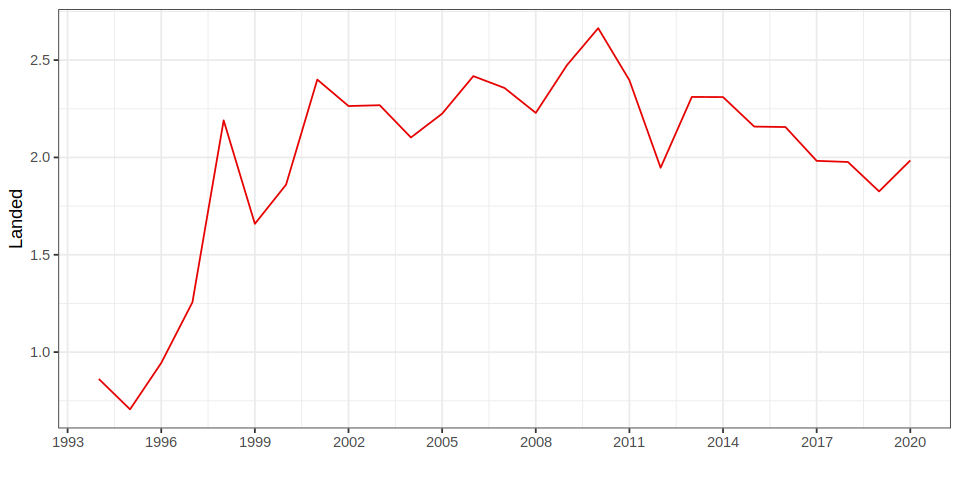

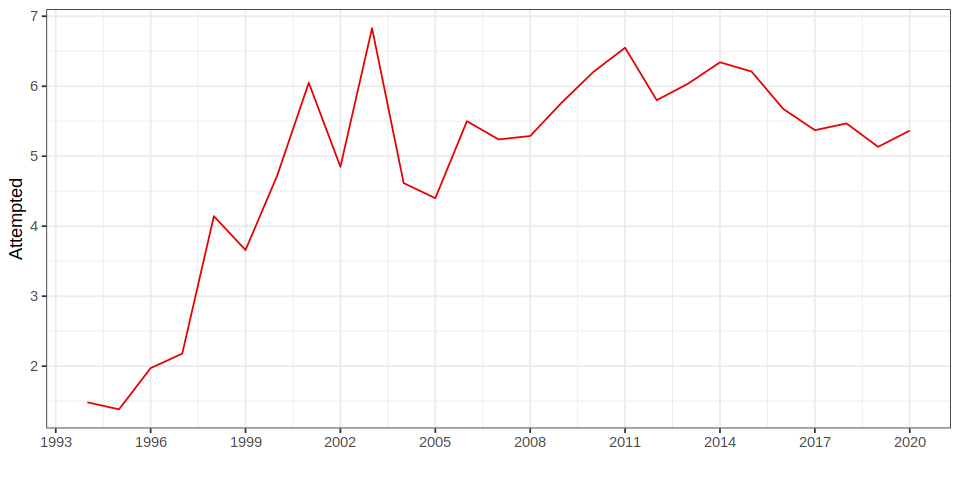

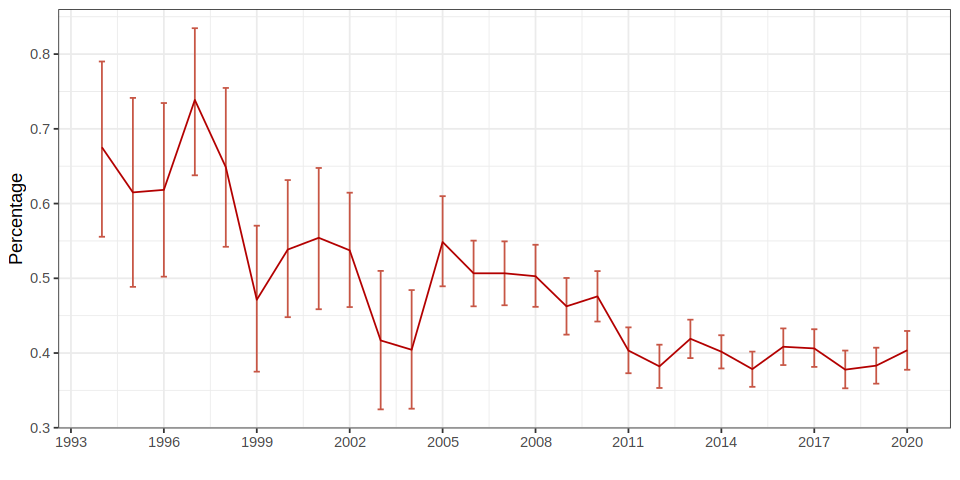

In [37]:
# Calculation of the average strikes attempted each year
meanVector = 0
yearVector = 0
for(i in 1994:2020){
    meanVector[i - 1993] = mean(raw_total_fight_data[raw_total_fight_data$year == paste0(i),]$TotalTDLanded)
    yearVector[i - 1993] = i
}
TDLandedDF = data.frame(yearVector, meanVector)

    ## Plotting of the strike attempts per year 
    ggplot(TDLandedDF, aes(yearVector, meanVector)) + 
        geom_line(color = '#e60000') + 
        scale_x_continuous(breaks=seq(1993,2020,by=3)) +
        labs(x = '', y = 'Landed') +
        theme_bw()

## Calculation of the average strikes attempted each year
meanVector = 0
yearVector = 0
for(i in 1994:2020){
    meanVector[i - 1993] = mean(raw_total_fight_data[raw_total_fight_data$year == paste0(i),]$TotalTDAttempted)
    yearVector[i - 1993] = i
}
TDAttemptedDF = data.frame(yearVector, meanVector)

    ## Plotting of the strike attempts per year 
    ggplot(TDAttemptedDF, aes(yearVector, meanVector)) + 
        geom_line(color = '#e60000') + 
        scale_x_continuous(breaks=seq(1993,2020,by=3)) +
        labs(x = '', y = 'Attempted') +
        theme_bw()

## Calculation of the average strikes attempted each year
meanVector = 0
yearVector = 0
for(i in 1994:2020){
    meanVector[i - 1993] = mean(na.omit(raw_total_fight_data[raw_total_fight_data$year == paste0(i),]$TDPercentage))
    yearVector[i - 1993] = i
}
# TDPercentageDF = data.frame(yearVector, meanVector)

options(repr.plot.width = 8, repr.plot.height = 4)
#     ## Plotting of the strike attempts per year 
#     ggplot(TDPercentageDF, aes(yearVector, meanVector)) + 
#         geom_line(color = '#b30000') + 
#         scale_x_continuous(breaks=seq(1993,2020,by=3)) +
#         labs(x = '', y = 'Percentage') +
#         theme_bw()

# options(repr.plot.width = 6, repr.plot.height = 4)

confidenceInterval = matrix(NA, 27, 2)


## Calculation of the average strikes attempted each year
B = 10000
alpha = 0.10
for(i in 1994:2020){
    sampleData = na.omit(raw_total_fight_data[raw_total_fight_data$year == paste0(i),]$TDPercentage)
    bootstrapSamples = t(replicate(B, sample(sampleData, length(sampleData), TRUE)))
    thetaStar = apply(bootstrapSamples, 1, mean)

    confidenceInterval[i - 1993, 1] = quantile(thetaStar, alpha/2)
    confidenceInterval[i - 1993, 2] = quantile(thetaStar, 1 - alpha/2) 
    
}

plus = confidenceInterval[,2]
minus = confidenceInterval[,1]

TDPercentageDF = data.frame(yearVector, meanVector, plus, minus)

    ggplot(TDPercentageDF, aes(yearVector, meanVector)) +
        geom_errorbar(aes(x = yearVector, y = meanVector, ymax = plus, 
                              ymin = minus), width = 0.2, color = '#C75645') + 
        geom_line(color = '#b30000') + 
        scale_x_continuous(breaks=seq(1993,2020,by=3)) +
        labs(x = '', y = 'Percentage') +
        theme_bw()

## Leg kick analysis

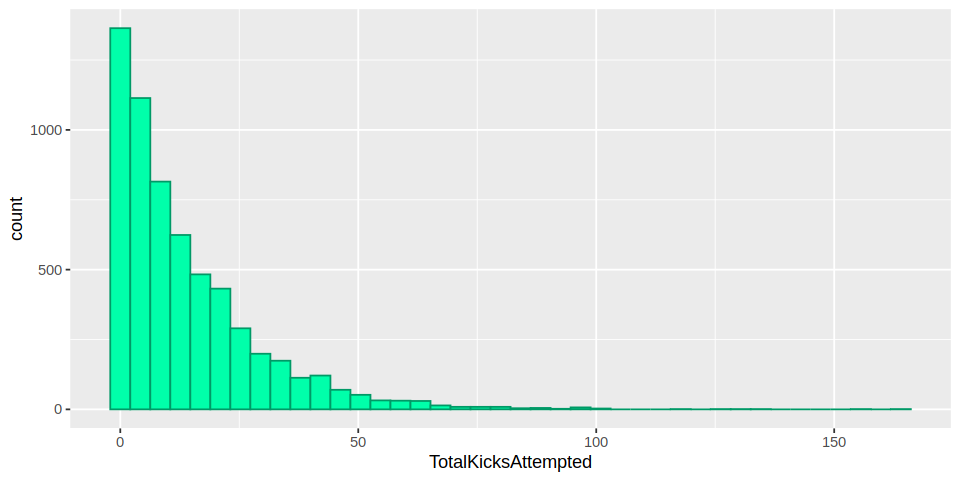

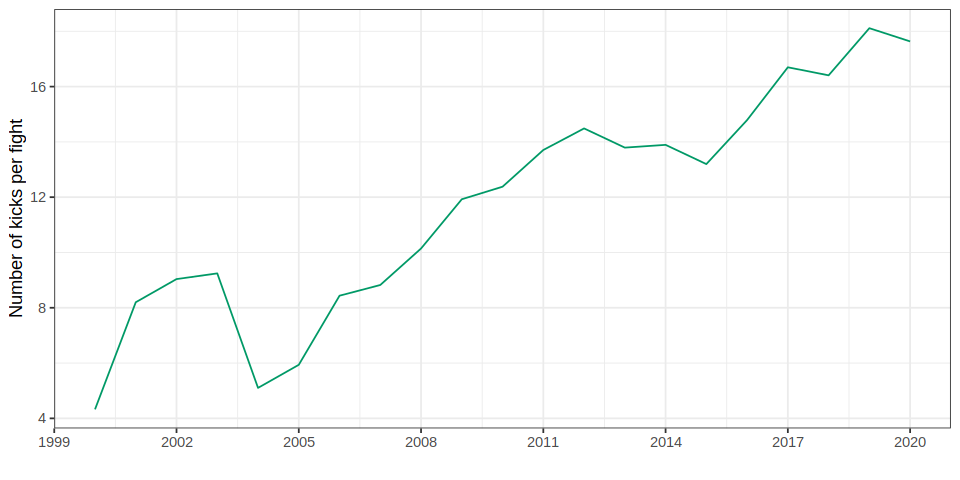

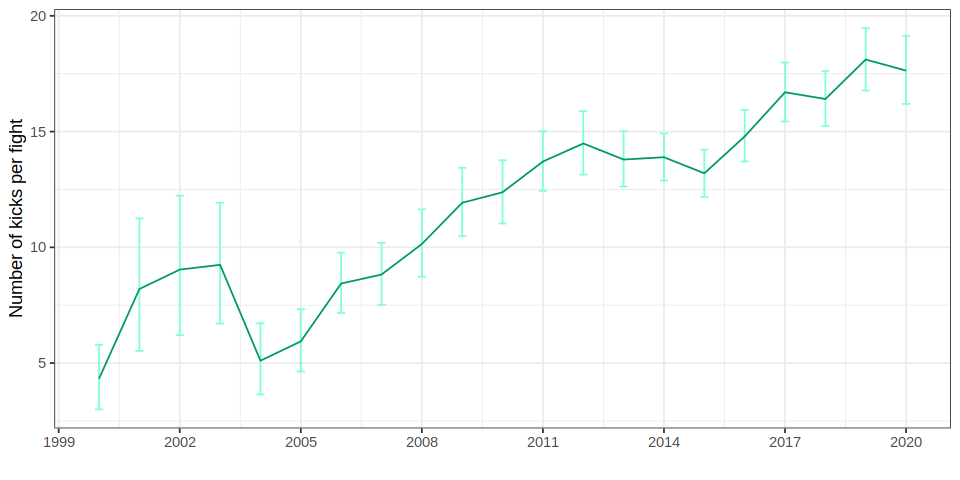

In [43]:
ggplot(raw_total_fight_data, aes(TotalKicksAttempted)) + 
    geom_histogram(bins = 40, fill = '#00ffaa', color = '#009966')

## Calculation of the average strikes attempted each year
meanVector = 0
yearVector = 0
for(i in 2000:2020){
    meanVector[i - 1999] = mean(raw_total_fight_data[raw_total_fight_data$year == paste0(i),]$TotalKicksAttempted)
    yearVector[i - 1999] = i
}
kicksVyearDF = data.frame(yearVector, meanVector)

    ## Plotting of the strike attempts per year 
    ggplot(kicksVyearDF, aes(yearVector, meanVector)) + 
        geom_line(color = '#009966') + 
        scale_x_continuous(breaks=seq(1999,2020,by=3)) +
        labs(x = '', y = 'Number of kicks per fight') +
        theme_bw()

StrikesvKicks = data.frame(kicksVyearDF$meanVector, strikesVyearDF$meanVector, strikesVyearDF$year)
colnames(StrikesvKicks) = c('Kicks', 'Strikes', 'year')

confidenceInterval = matrix(NA, 21, 2)

B = 10000
alpha = 0.10
for(i in 2000:2020){
    sampleData = raw_total_fight_data[raw_total_fight_data$year == paste0(i),]$TotalKicksAttempted
    bootstrapSamples = t(replicate(B, sample(sampleData, length(sampleData), TRUE)))
    thetaStar = apply(bootstrapSamples, 1, mean)

    confidenceInterval[i - 1999, 1] = quantile(thetaStar, alpha/2)
    confidenceInterval[i - 1999, 2] = quantile(thetaStar, 1 - alpha/2) 
    
}

plus = confidenceInterval[,2]
minus = confidenceInterval[,1]

kicksVyearDF = data.frame(yearVector, meanVector, plus, minus)

    ggplot(kicksVyearDF, aes(yearVector, meanVector)) +
        geom_errorbar(aes(x = yearVector, y = meanVector, ymax = plus, 
                              ymin = minus), width = 0.2, color = '#80ffd4') + 
        geom_line(color = '#009966') + 
        scale_x_continuous(breaks=seq(1993,2020,by=3)) +
        labs(x = '', y = 'Number of kicks per fight') +
        theme_bw()


In [15]:
paste0('The correlation coeffecient between Strikes and Kicks is: ', round(cor(StrikesvKicks$Strikes, StrikesvKicks$Kicks), 3)) 

[1] "The correlation coeffecient between Strikes and Kicks is: 0.98"

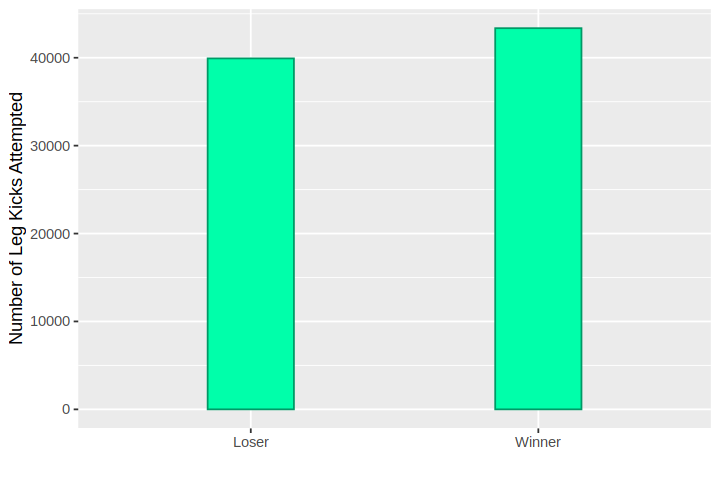

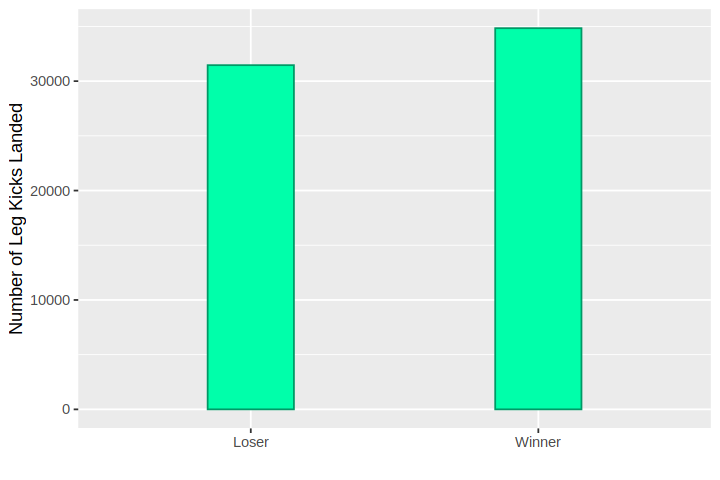

In [16]:
## Kicks attempted
    WinnerLegAttempts = c(raw_total_fight_data[which(raw_total_fight_data$RedWon == 1), "RLegKicksAttempted"], raw_total_fight_data[which(raw_total_fight_data$BlueWon == 1), "BLegKicksAttempted"])
    LoserLegAttempts = c(raw_total_fight_data[which(raw_total_fight_data$RedWon == 1), "BLegKicksAttempted"], raw_total_fight_data[which(raw_total_fight_data$BlueWon == 1), "RLegKicksAttempted"])

    legKickDF = data.frame(WinnerLegAttempts, LoserLegAttempts)

    kickAttemptedDF = data.frame(c('Winner','Loser'),c(sum(legKickDF$WinnerLegAttempts), sum(legKickDF$LoserLegAttempts)))
    colnames(kickAttemptedDF) = c('who','kicks')

    ggplot(kickAttemptedDF, aes(x = who, y = kicks)) +
        geom_bar(stat = "identity", fill = '#00ffaa', color = '#009966', width = 0.3) + 
        labs(x = '', y = 'Number of Leg Kicks Attempted')



## Kicks landed
    WinnerLegLanded = c(raw_total_fight_data[which(raw_total_fight_data$RedWon == 1), "RLegKicksLanded"], raw_total_fight_data[which(raw_total_fight_data$BlueWon == 1), "BLegKicksLanded"])
    LoserLegLanded = c(raw_total_fight_data[which(raw_total_fight_data$RedWon == 1), "BLegKicksLanded"], raw_total_fight_data[which(raw_total_fight_data$BlueWon == 1), "RLegKicksLanded"])

    legKickDF = data.frame(WinnerLegLanded, LoserLegLanded)

    kickLandedDF = data.frame(c('Winner', 'Loser'), c(sum(legKickDF$WinnerLegLanded), sum(legKickDF$LoserLegLanded)))
    colnames(kickLandedDF) = c('who', 'kicks')

        ggplot(kickLandedDF, aes(x = who, y = kicks)) +
            geom_bar(stat = "identity", fill = '#00ffaa', color = '#009966', width = 0.3) + 
            labs(x = '', y = 'Number of Leg Kicks Landed')

In [17]:
## Percentages
    paste0('Winner land percentage: ', round(mean(WinnerLegLanded/WinnerLegAttempts, na.rm = TRUE), 3))
    paste0('Loser land percentage: ', round(mean(LoserLegLanded/LoserLegAttempts, na.rm = TRUE), 3))


sd(WinnerLegLanded/WinnerLegAttempts, na.rm = TRUE)
sd(LoserLegLanded/LoserLegAttempts, na.rm = TRUE)

[1] "Winner land percentage: 0.812"

[1] "Loser land percentage: 0.788"

[1] 0.2362308

[1] 0.2558626